In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
import json
import zipcodes as zc
from uszipcode import SearchEngine

In [2]:
df = pd.read_csv('./data/sya-county.csv')

In [3]:
df.head()

,id,countyfips,year,age,county,malepopulation,femalepopulation,totalpopulation,datatype
0,431459,31,2015,60,Denver,3780.981710,3806.765090,7587.746800,Estimate
1,431460,31,2015,61,Denver,3572.036699,3661.116908,7233.153607,Estimate
2,431461,31,2015,62,Denver,3407.476263,3507.773529,6915.249792,Estimate
3,431462,31,2015,63,Denver,3239.365801,3346.007085,6585.372886,Estimate
4,431463,31,2015,64,Denver,3068.045085,3179.916715,6247.961800,Estimate


In [4]:
def getPopulationSeriesByCounty(data):
    return pd.pivot_table(df, index='year', columns='county', values='totalpopulation', aggfunc=np.sum)

def getTimeSeriesForCounty(df, county):
    new_df = getPopulationSeriesByCounty(df)
    return new_df[county]

def getPopulationOverYearsByCounty(df, county, year_list):
    new_df = getTimeSeriesForCounty(df, county)
    return new_df[year_list].sum()

def getYearList(start, end):
    return [i for i in range(start, end + 1)]

In [44]:
new_df = getPopulationSeriesByCounty(df)
getPopulationOverYearsByCounty(new_df, 'Adams', [2020])

542608.5447988301

In [6]:
new_df.head()

county,Adams,Alamosa,Arapahoe,Archuleta,Baca,Bent,Boulder,Broomfield,Chaffee,Cheyenne,...,Routt,Saguache,San Juan,San Miguel,Sedgwick,Summit,Teller,Washington,Weld,Yuma
year,,,,,,,,,,,,,,,,,,,,,
1990,265709.0,13617.0,393289.0,5352.0,4556.0,5048.0,226022.0,0.0,12684.0,2397.0,...,14169.0,4619.0,745.0,3723.0,2690.0,12926.0,12471.0,4812.0,131964.0,8954.0
1991,273620.0,13641.0,403200.0,5624.0,4438.0,4965.0,230977.0,0.0,12866.0,2477.0,...,14729.0,4735.0,703.0,4124.0,2668.0,13469.0,12717.0,4784.0,135739.0,9007.0
1992,281386.0,13572.0,417678.0,5888.0,4298.0,5037.0,238392.0,0.0,13119.0,2407.0,...,15153.0,4796.0,575.0,4563.0,2633.0,13845.0,13673.0,4892.0,140128.0,9008.0
1993,290782.0,13656.0,427474.0,6183.0,4325.0,5357.0,247282.0,0.0,13702.0,2307.0,...,15925.0,4831.0,541.0,4869.0,2650.0,15189.0,14734.0,5139.0,145779.0,9172.0
1994,300793.0,13826.0,436413.0,6538.0,4387.0,5401.0,252726.0,0.0,14104.0,2297.0,...,16619.0,4943.0,558.0,5308.0,2660.0,17107.0,15786.0,5220.0,151375.0,9278.0


In [7]:
adams_df = new_df['Adams']

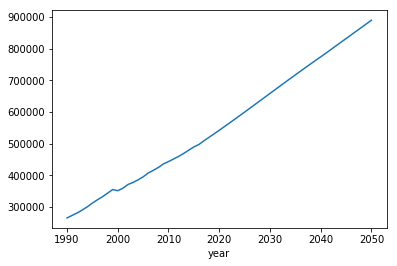

In [8]:
adams_df.plot()

In [9]:
# Some code to come up with a per capita energy use estimate
api_key = 'WtCLbSmaluaxeipV1QNS5Tnh4q5Qs5s9I6g2kwf4'
base_url = 'https://developer.nrel.gov'
index_api_url = '/api/cleap/v1/energy_expenditures_and_ghg_by_sector'
payload = {"api_key": api_key,
           "zip": "80241"
          }
ret = requests.get(base_url + index_api_url, params=payload)
data = ret.json()
use_df = pd.DataFrame.from_dict(data["result"])
use_df

,Northglenn,Thornton,Westminster
commercial,"{'num_establishments': 388, 'elec_1kdollars': ...","{'num_establishments': 946, 'elec_1kdollars': ...","{'num_establishments': 1230, 'elec_1kdollars':..."
industrial,"{'num_establishments': 135, 'elec_1kdollars': ...","{'num_establishments': 483, 'elec_1kdollars': ...","{'num_establishments': 408, 'elec_1kdollars': ..."
residential,"{'housing_units': 13842, 'total_pop': 38128, '...","{'housing_units': 43338, 'total_pop': 130511, ...","{'housing_units': 42624, 'total_pop': 111770, ..."


In [32]:
search = SearchEngine(simple_zipcode=True)
co_zips = [res['zip_code'] for res in zc.filter_by(zc.list_all(), state='CO')]

def getZipCodesInCounty(zip_list, county, s_eng):
    ret = list()
    for z in zip_list:
        res = s_eng.by_zipcode(z).to_dict()
        if (res['county'] == county):
            ret.append(z)
    return ret

ad_zips = getZipCodesInCounty(co_zips, 'Adams County', search)
ad_zips

['80019',
 '80045',
 '80102',
 '80601',
 '80602',
 '80022',
 '80037',
 '80221',
 '80229',
 '80233',
 '80234',
 '80241',
 '80260',
 '80024',
 '80614',
 '80640',
 '80136',
 '80030',
 '80031']

In [36]:
def getZipQuery(zip_code, api_key):
    payload = {"api_key": api_key,
               "zip": zip_code}
    ret = requests.get(base_url + index_api_url, params=payload)
    return ret.json()

d = getZipQuery('80241', api_key)['result']
d.keys()

dict_keys(['Northglenn', 'Westminster', 'Thornton'])

In [48]:
def getCountyPerCapita(county, api_key):
    fields = ['residential', 'industrial', 'commercial']
    total_energy = 0.0
    n_people = 0
    zips = getZipCodesInCounty(co_zips, county, search)
    for z in zips:
        res = getZipQuery(z, api_key)
        if (len(res['errors']) != 0):
            continue
        res = res['result']
        for key in res.keys():
            if (res[key]['residential']['total_pop'] is None):
                continue
            n_people += res[key]['residential']['total_pop']
            for field in fields:
                if (res[key][field]['elec_mwh'] is None):
                    continue
                total_energy += res[key][field]['elec_mwh']
    if (n_people == 0 or total_energy == 0.0):
        return -1.0
    return total_energy / float(n_people)

getCountyPerCapita('Denver County', api_key)

10.921283866720888

In [46]:
# Get all available counties in CO and years of interest
counties = list()
for z in co_zips:
    county = search.by_zipcode(z).to_dict()['county']
    if (not (county in counties) and not (county == '')):
        counties.append(county)
        
counties_no_county = list()
for county in counties:
    split = county.split(' ')
    new = list()
    for s in split:
        if (s != 'County'):
            new.append(s)
    new = ' '.join(new)
    counties_no_county.append(new)
counties_no_county

years_of_interest = [*range(1990, 2040)]
years_of_interest

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039]

In [49]:
# Get the per-capita data
per_capitas = list()
for county in counties:
    per_capitas.append(getCountyPerCapita(county, api_key))
    
per_capitas

[10.732933233308326,
 9.470076049818141,
 10.831694402420576,
 8.476714300400946,
 7.692119834644522,
 8.226032190342897,
 8.423506366307542,
 8.790710846785613,
 4.272311573636077,
 28.606846473029044,
 7.61648016276704,
 21.023715415019762,
 11.310220621341738,
 10.120294685364824,
 11.602772559435124,
 7.067528922396984,
 8.757746319431785,
 8.901212029906137,
 7.560848768350064,
 8.273957264159746,
 6.152530463247014,
 8.527329800448658,
 9.035513951909678,
 7.855632768914554,
 10.331396795795541,
 13.867545193444839,
 15.087595907928389,
 3.3368146214099217,
 8.234179626614942,
 6.337564416158066,
 12.398198885024062,
 7.81175671083928,
 16.760137719969396,
 8.57869249394673,
 5.3106423712469235,
 14.197470420236638,
 7.18140940586761,
 5.746345549076313,
 6.151400838962685,
 6.118602188492764,
 8.944403460532493,
 10.388429752066116,
 6.953005084934702,
 10.683163131709872,
 9.174636174636175,
 7.02997002997003,
 49.345454545454544,
 10.913304035157811,
 4.266487935656836,
 7.608

In [50]:
len(per_capitas) == len(counties)

True

In [51]:
est_energy_use_df = pd.DataFrame([], columns=['county', 'year', 'energy_use'])
for county, per_capita in zip(counties_no_county, per_capitas):
    for year in years_of_interest:
        est_energy_use_df.loc[est_energy_use_df.shape[0]] = [county, year, per_capita * 1000.0 * getPopulationOverYearsByCounty(new_df, county, [year])]
est_energy_use_df

,county,year,energy_use
0,Elbert,1990,1.046032e+08
1,Elbert,1991,1.101950e+08
2,Elbert,1992,1.155293e+08
3,Elbert,1993,1.238044e+08
4,Elbert,1994,1.378753e+08
5,Elbert,1995,1.537493e+08
6,Elbert,1996,1.697091e+08
7,Elbert,1997,1.823203e+08
8,Elbert,1998,1.935148e+08
9,Elbert,1999,2.048488e+08


In [54]:
len(est_energy_use_df.county.unique()) == len(counties)

True

In [55]:
est_energy_use_df.to_csv("./data/EnergyConsumption.csv", index=False)

In [64]:
from fbprophet import Prophet
import datetime as dt
m = Prophet()
today = dt.datetime.today()
date_list = list()
for x in range(0, 5000):
    date_list.append(today - dt.timedelta(days = x))
d = dict(zip(date_list, np.random.random((len(date_list)))))